In [3]:
import string 
from collections import Counter 

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [12]:
text=open("message.txt",encoding="utf-8").read()
data=text.lower()
data

'i am honored to be with you today at your commencement from one of the finest universities in the world. i never graduated from college. truth be told, this is the closest i’ve ever gotten to a college graduation. today i want to tell you three stories from my life. that’s it. no big deal. just three stories.\n\nrelated to this story\n2005 stanford commencement coverage\nthe first story is about connecting the dots.\n\ni dropped out of reed college after the first 6 months, but then stayed around as a drop-in for another 18 months or so before i really quit. so why did i drop out?\n\nit started before i was born. my biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. she felt very strongly that i should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. except that when i popped out they decided at the last minute that they really wanted a girl. so my parents, who were

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
tokenized_words=word_tokenize(data,"english")

In [9]:
# removing stop words
final_words=[]
for word in tokenized_words:
  if word not in stopwords.words('english'):
    final_words.append(word)

In [ ]:
#lemmatization -from plural to singular base form (real english meaning)
nltk.download('wordnet')
nltk.download('omw-1.4')
lemma_words=[]
for word in final_words:
  word=WordNetLemmatizer().lemmatize(word)
  lemma_words.append(word)

In [7]:
emotion_list=[]

with open("emotion_details.txt",'r') as file:
  for line in file:
    clear_line=line.replace("\n",'').replace(",",'').replace("'",'').strip()
    word,emotion = clear_line.split(':') # split by colon this is the word and this is the emtion

    if word in lemma_words:
      emotion_list.append(emotion)
      
print(emotion_list)
w=Counter(emotion_list)
print(w)

[' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled']
Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


In [21]:
score=SentimentIntensityAnalyzer().polarity_scores(data)
score

{'neg': 0.091, 'neu': 0.747, 'pos': 0.162, 'compound': 0.9996}

In [22]:
def sentiment_analyse(sentiment_text):
  score=SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
  if score['neg']>score['pos']:
    print("negative sentiment")
  elif score['neg']<score['pos']:
    print("postive sentiment")
  else :
    print("Neutral Sentiment")
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
sentiment_analyse(data)

postive sentiment


In [27]:
w.keys()

dict_keys([' happy', ' attached', ' attracted', ' alone', ' free', ' hated', ' entitled', ' loved'])

In [28]:
w.values()

dict_values([5, 1, 1, 1, 1, 2, 2, 1])

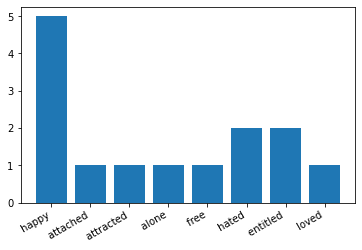

In [26]:
fig,ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()